# Imports


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import math
from skimage.feature import hog

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Fetching and analysing the data
Minimum number of faces per person selected = 70

Number of labels = 7

Number of images = 1288

In [ ]:
from sklearn.datasets import fetch_lfw_people

# Download and load the LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Extract data and target labels
X = lfw_dataset.images
y = lfw_dataset.target
target_names = lfw_dataset.target_names

# Print information about the dataset
print("Number of images:", X.shape[0])
print("Image size:", X.shape[1:])
print("Number of unique classes:", len(target_names))
print("Target class names:", target_names)
num_samples, num_features = lfw_dataset.data.shape
num_classes = len(target_names)

Number of images: 1288
Image size: (50, 37)
Number of unique classes: 7
Target class names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


 Sample images

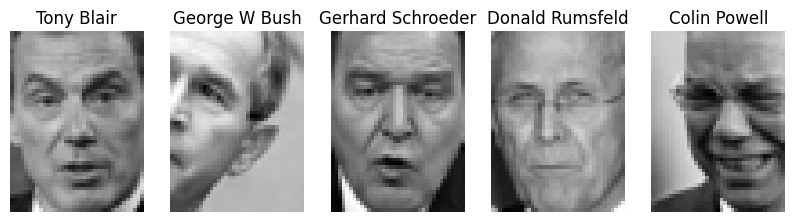

In [ ]:
num_samples_to_display = 5
random_indices = np.random.choice(num_samples, num_samples_to_display, replace=False)

plt.figure(figsize=(10, 4))
for i, index in enumerate(random_indices, 1):
    plt.subplot(1, num_samples_to_display, i)
    plt.imshow(X[index].reshape((50, 37)), cmap='gray')
    plt.title(target_names[y[index]])
    plt.axis('off')
plt.show()

Distribution of classes

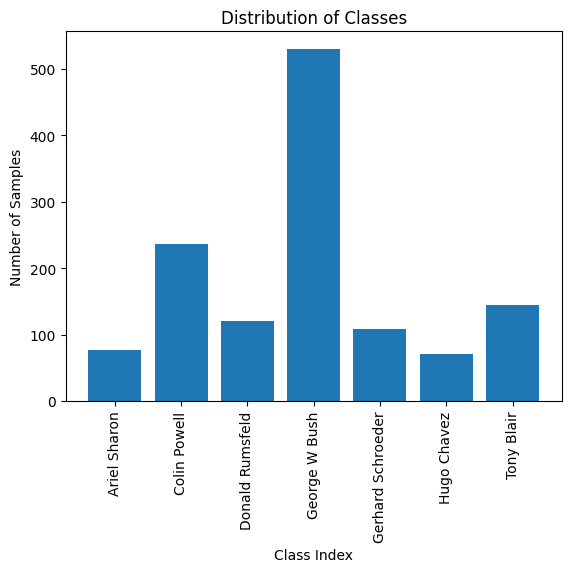

In [ ]:
class_counts = np.bincount(y)
plt.bar(range(num_classes), class_counts)
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.title('Distribution of Classes')
plt.xticks(range(num_classes), target_names, rotation=90)
plt.show()

Analysing how each image data looks like

shape of each image data:  (50, 37)
[[0.9973857  0.99607843 0.9921568  ... 0.29803923 0.24836601 0.20653595]
 [0.9973857  0.9921569  0.9908497  ... 0.30588236 0.2535948  0.21568628]
 [0.96078426 0.93071896 0.8679738  ... 0.2875817  0.24183007 0.21568628]
 ...
 [0.34509805 0.26143792 0.17385621 ... 0.4248366  0.40261438 0.39084968]
 [0.30980393 0.23398693 0.17124183 ... 0.39869282 0.4013072  0.3764706 ]
 [0.28366014 0.2248366  0.18039216 ... 0.38169935 0.38823533 0.3803922 ]]


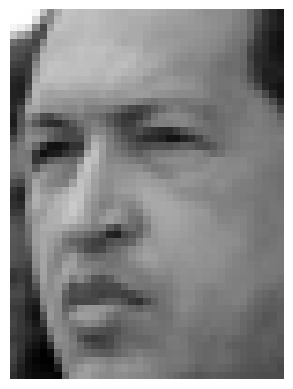

In [ ]:
print('shape of each image data: ',lfw_dataset.images[0].shape)
print(lfw_dataset.images[0])
plt.axis("off")
plt.imshow(lfw_dataset.images[0], cmap='gray')

Reshaping the data into single array of 1850 (50 * 37) features

In [ ]:
print('shape of each image data: ',lfw_dataset.data[0].shape)
print(lfw_dataset.data[0])

shape of each image data:  (1850,)
[0.9973857  0.99607843 0.9921568  ... 0.38169935 0.38823533 0.3803922 ]


# Implementing Different Feature Extraction Techniques from Scratch


*   Linear Binary Pattern [LBP]
*   Histogram of Oriented Gradients [HoG]
*   Convolutional Neural Networks [CNN]





##Linear Binary Pattern

From Scratch implementation

In [ ]:
def lbp_features(image):
  lbp_image = np.ones([50,37])
  for y in range(1,image.shape[0]-1):
    for x in range(1,image.shape[1]-1):
      l = [*list(image[y-1][x-1:x+2]),image[y][x+1],*list(image[y+1][x+1:x-1:-1]),image[y+1][x-1],image[y][x-1]]
      mwl= [2**i if image[y][x] >= l[i] else 0 for i in range(len(l))]
      lbp_image[y][x] = sum(mwl)
  return lbp_image

Original Image

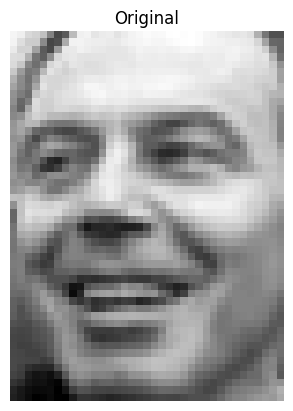

In [ ]:
plt.axis("off")
plt.title('Original')
plt.imshow(lfw_dataset.images[163],cmap='gray')

LBP Feature Extracted Image

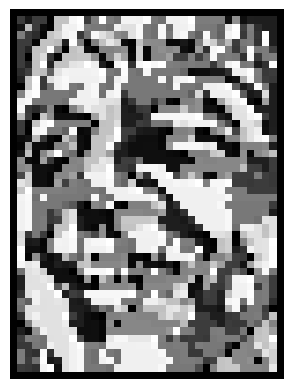

In [ ]:
a = lbp_features(lfw_dataset.images[163])
plt.axis("off")
plt.imshow(a,cmap='gray')

LBP using sklearn local_binary_pattern function

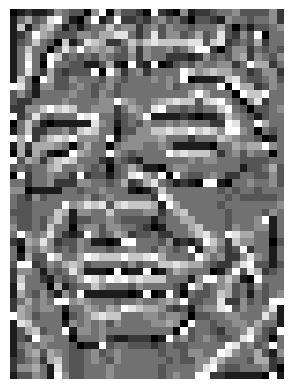

In [ ]:
from skimage.feature import local_binary_pattern
radius = 1
num_points = 8 * radius
lbp_image = local_binary_pattern(lfw_dataset.images[163], num_points, radius, method='uniform')
plt.axis("off")
plt.imshow(lbp_image.astype(np.uint8), cmap= 'gray')

## Histogram of Oriented Gradients

**Resizing Image to 64 X 128 size**

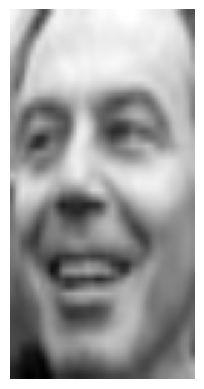

In [ ]:
img = cv2.resize(lfw_dataset.images[163], (64, 128))
plt.axis("off")
plt.imshow(img, cmap='gray')

**Vertical Gradient Detection**

In [ ]:
def img_gradient_ver(image):
  lbp_image = np.ones(image.shape)
  for y in range(0,image.shape[0]):
    for x in range(1,image.shape[1]-1):
      lbp_image[y][x] = image[y][x+1]-image[y][x-1]
  return lbp_image

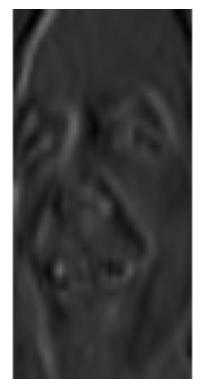

In [ ]:
a = img_gradient_ver(img)
plt.axis("off")
plt.imshow(a,cmap='gray')

**Horizontal Gradient Detection**

In [ ]:
def img_gradient_horr(image):
  lbp_image = np.ones(image.shape)
  for y in range(1,image.shape[0]-1):
    for x in range(0,image.shape[1]):
      lbp_image[y][x] = image[y+1][x]-image[y-1][x]
  return lbp_image

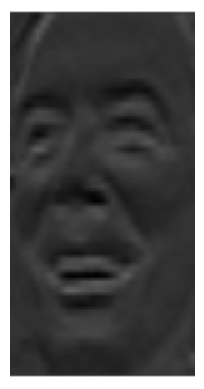

In [ ]:
b = img_gradient_horr(img)
plt.axis("off")
plt.imshow(b,cmap='gray')

**Adding both vertical and horizontal gradients**

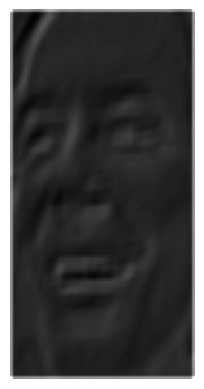

In [ ]:
plt.axis("off")
plt.imshow(a+b,cmap='gray')

**Gradient and Angle of image**

In [ ]:
mag = []
theta = []
for i in range(128):
  magnitudeArray = []
  angleArray = []
  for j in range(64):

    if j-1 <= 0 or j+1 >= 64:
      if j-1 <= 0:
        Gx = img[i][j+1] - 0
      elif j + 1 >= len(img[0]):
        Gx = 0 - img[i][j-1]
    else:
      Gx = img[i][j+1] - img[i][j-1]

    if i-1 <= 0 or i+1 >= 128:
      if i-1 <= 0:
        Gy = 0 - img[i+1][j]
      elif i +1 >= 128:
        Gy = img[i-1][j] - 0
    else:
      Gy = img[i-1][j] - img[i+1][j]

    magnitude = math.sqrt(pow(Gx, 2) + pow(Gy, 2))     # Calculating magnitude
    magnitudeArray.append(round(magnitude, 9))

    if Gx == 0:     # Calculating angle
      angle = math.degrees(0.0)
    else:
      angle = math.degrees(abs(math.atan(Gy / Gx)))
    angleArray.append(round(angle, 9))
  mag.append(magnitudeArray)
  theta.append(angleArray)

**Represetation of magnitude of gradient of image**

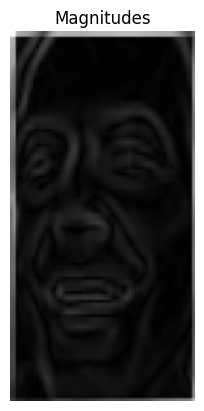

In [ ]:
plt.imshow(mag, cmap="gray")
plt.axis("off")
plt.title('Magnitudes')
plt.show()

**Representation of angle of image**

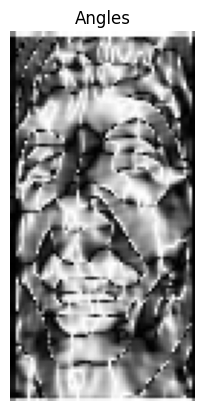

In [ ]:
plt.imshow(theta, cmap="gray")
plt.axis("off")
plt.title('Angles')
plt.show()

**Final Histogram of Oriented Gradients Image**

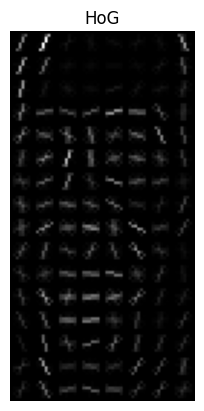

In [ ]:
_ , hog_image = hog(img, orientations=8, pixels_per_cell=(8, 8),
                             cells_per_block=(2, 2), visualize=True)
plt.axis('off')
plt.title('HoG')
plt.imshow(hog_image, cmap='gray')

## Convolutional Layers

Convolution function from scratch

In [ ]:
def convolutional_features(image, kernel):
    output = np.zeros((image.shape[0] - kernel.shape[0] + 1, image.shape[1] - kernel.shape[1] + 1))
    for i in range(output.shape[0]):
      for j in range(output.shape[1]):
        output[i, j] = np.multiply(image[i:i+kernel.shape[0],j:j+kernel.shape[1]],kernel).sum()
    return output

3 different types of kernels

In [ ]:
kernel_ver = np.array([[-1, 0, 1],
                   [-2,0,2],
                   [-1,0,1]])

kernel_hor = np.array([[-1, -2, -1],
                   [0,0,0],
                   [1,2,1]])

kernel_gabor = np.array([[-0.2324, -0.268, -0.2324],
                   [0.8673,1,0.8673],
                   [-0.2324,-0.268,-0.2324]])

Verrtical kernel for edge detection

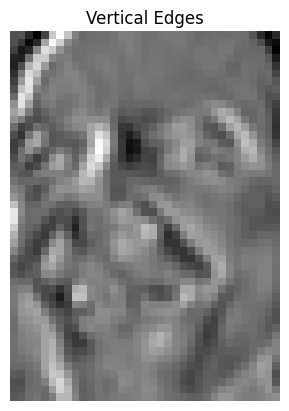

In [ ]:
d = convolutional_features(lfw_dataset.images[163], kernel_ver)
plt.axis('off')
plt.title('Vertical Edges')
plt.imshow(d, cmap='gray')

Horizontal kernel for edge detection

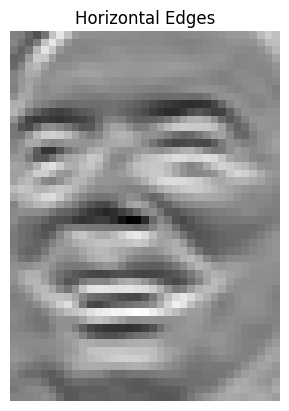

In [ ]:
e = convolutional_features(lfw_dataset.images[163], kernel_hor)
plt.title('Horizontal Edges')
plt.axis('off')
plt.imshow(e, cmap='gray')

Gabor Filter Kernel

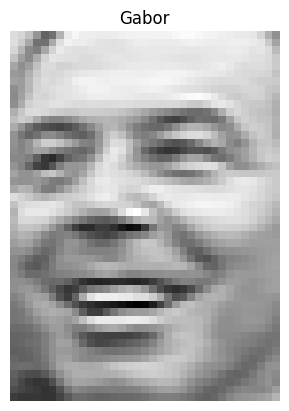

In [ ]:
f = convolutional_features(lfw_dataset.images[163], kernel_gabor)
plt.title('Gabor')
plt.axis('off')
plt.imshow(f, cmap='gray')

Using all 3 at the same time

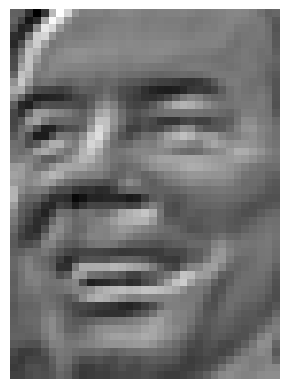

In [ ]:
plt.axis('off')
plt.imshow(d + e + f, cmap ='gray')

# Classification
Classifying the images with different classifiers:

*   SVM
*   KNN
*   Decision Tree





In [ ]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Trying PCA

In [ ]:
X = lfw_dataset.data
y = lfw_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #scaling train and test data
X_test = scaler.transform(X_test)

pca = PCA(n_components = 10)
pca.fit(X_train)
print(pca.explained_variance_ratio_)

[0.255891   0.1450748  0.06833295 0.0516422  0.03171235 0.02718069
 0.0204603  0.0168401  0.01583593 0.01506251]


#Results with LBP

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 50, 37))
X_test = np.reshape(X_test, (X_test.shape[0], 50, 37))

In [ ]:
X_train_lbp = [lbp_features(x) for x in X_train]
X_test_lbp = [lbp_features(x) for x in X_test]

X_train_lbp = np.array(X_train_lbp)
X_test_lbp = np.array(X_test_lbp)

X_train_lbp = X_train_lbp.reshape((X_train.shape[0], 50*37))
X_test_lbp = X_test_lbp.reshape((X_test.shape[0], 50*37))

SVM

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        12
     Colin Powell       0.83      0.91      0.87        55
  Donald Rumsfeld       1.00      0.14      0.25        21
    George W Bush       0.62      0.98      0.76       106
Gerhard Schroeder       1.00      0.21      0.35        19
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.91      0.70      0.79        30

         accuracy                           0.71       258
        macro avg       0.62      0.42      0.43       258
     weighted avg       0.69      0.71      0.64       258



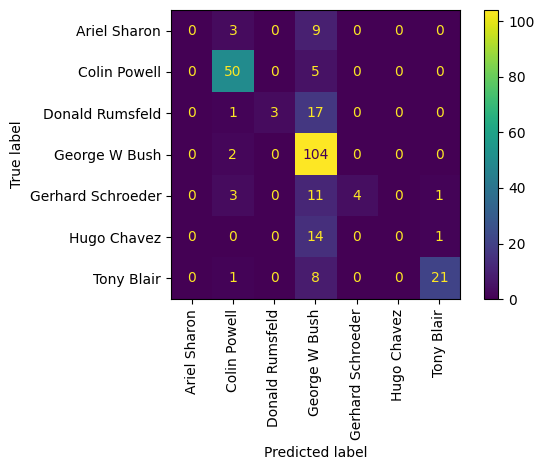

In [ ]:
svm_lbp = SVC(kernel='rbf', decision_function_shape='ovo' )
svm_lbp.fit(X_train_lbp, y_train)

lbp_predictions = svm_lbp.predict(X_test_lbp)
print(classification_report(y_test, lbp_predictions, target_names = target_names))
ConfusionMatrixDisplay.from_estimator(svm_lbp, X_test_lbp, y_test, display_labels=target_names, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

KNN

                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.67      0.73        12
     Colin Powell       0.85      0.85      0.85        55
  Donald Rumsfeld       0.93      0.67      0.78        21
    George W Bush       0.80      0.96      0.87       106
Gerhard Schroeder       0.78      0.74      0.76        19
      Hugo Chavez       0.71      0.33      0.45        15
       Tony Blair       0.96      0.80      0.87        30

         accuracy                           0.83       258
        macro avg       0.83      0.72      0.76       258
     weighted avg       0.83      0.83      0.82       258



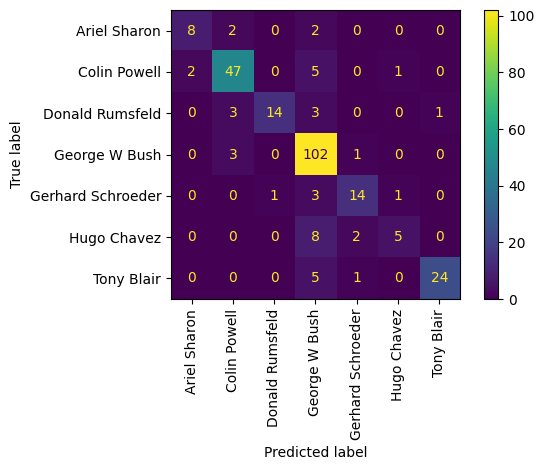

In [ ]:
knn_lbp = KNeighborsClassifier(n_neighbors = 5)
knn_lbp.fit(X_train_lbp, y_train)

lbp_predictions = knn_lbp.predict(X_test_lbp)
print(classification_report(y_test, lbp_predictions, target_names = target_names))
ConfusionMatrixDisplay.from_estimator(knn_lbp, X_test_lbp, y_test, display_labels=target_names, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

Decision Tree

                   precision    recall  f1-score   support

     Ariel Sharon       0.12      0.17      0.14        12
     Colin Powell       0.59      0.47      0.53        55
  Donald Rumsfeld       0.10      0.10      0.10        21
    George W Bush       0.61      0.58      0.60       106
Gerhard Schroeder       0.38      0.47      0.42        19
      Hugo Chavez       0.10      0.13      0.11        15
       Tony Blair       0.27      0.27      0.27        30

         accuracy                           0.43       258
        macro avg       0.31      0.31      0.31       258
     weighted avg       0.45      0.43      0.44       258



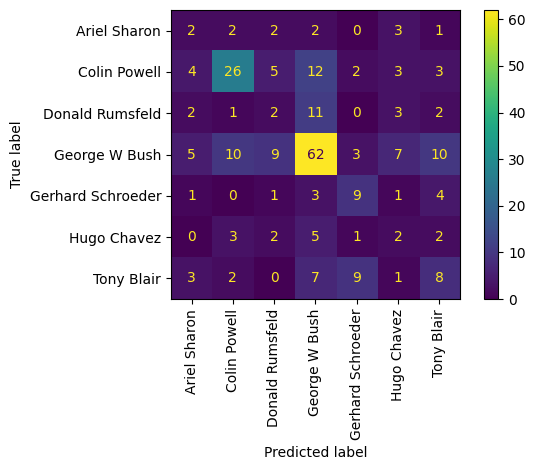

In [ ]:
tree_lbp = DecisionTreeClassifier()
tree_lbp.fit(X_train_lbp, y_train)

lbp_predictions = tree_lbp.predict(X_test_lbp)
print(classification_report(y_test, lbp_predictions, target_names = target_names))
ConfusionMatrixDisplay.from_estimator(tree_lbp, X_test_lbp, y_test, display_labels=target_names, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

# Results with HoG

In [ ]:
X_train_hog = [hog_image for _ , hog_image in [hog(x, orientations=8, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True) for x in X_train]]
X_test_hog = [hog_image for _ , hog_image in [hog(x, orientations=8, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True) for x in X_test]]

X_train_hog = np.array(X_train_hog)
X_test_hog = np.array(X_test_hog)

X_train_hog = X_train_hog.reshape((X_train.shape[0], 50*37))
X_test_hog = X_test_hog.reshape((X_test.shape[0], 50*37))

SVM

                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.42      0.56        12
     Colin Powell       0.86      0.89      0.88        55
  Donald Rumsfeld       0.71      0.48      0.57        21
    George W Bush       0.71      0.99      0.83       106
Gerhard Schroeder       0.70      0.37      0.48        19
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.87      0.67      0.75        30

         accuracy                           0.76       258
        macro avg       0.67      0.54      0.58       258
     weighted avg       0.72      0.76      0.72       258



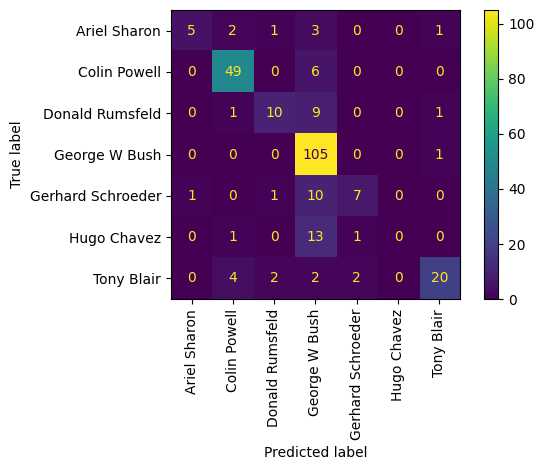

In [ ]:
svm_hog = SVC(kernel = 'rbf', decision_function_shape='ovo')
svm_hog.fit(X_train_hog, y_train)

hog_predictions = svm_hog.predict(X_test_hog)
print(classification_report(y_test, hog_predictions, target_names = target_names))
ConfusionMatrixDisplay.from_estimator(svm_hog, X_test_hog, y_test, display_labels=target_names, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

KNN

                   precision    recall  f1-score   support

     Ariel Sharon       0.55      0.50      0.52        12
     Colin Powell       0.88      0.82      0.85        55
  Donald Rumsfeld       0.54      0.67      0.60        21
    George W Bush       0.78      0.94      0.85       106
Gerhard Schroeder       0.58      0.58      0.58        19
      Hugo Chavez       0.75      0.20      0.32        15
       Tony Blair       0.74      0.47      0.57        30

         accuracy                           0.75       258
        macro avg       0.69      0.60      0.61       258
     weighted avg       0.75      0.75      0.73       258



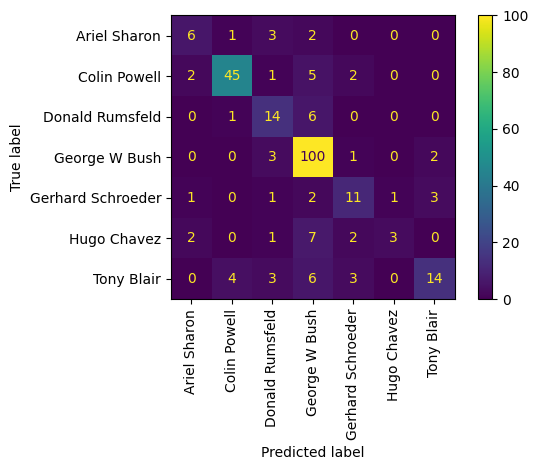

In [ ]:
knn_hog = KNeighborsClassifier(n_neighbors = 5)
knn_hog.fit(X_train_hog, y_train)

hog_predictions = knn_hog.predict(X_test_hog)
print(classification_report(y_test, hog_predictions, target_names = target_names))
ConfusionMatrixDisplay.from_estimator(knn_hog, X_test_hog, y_test, display_labels=target_names, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

Decision Tree

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        12
     Colin Powell       0.56      0.58      0.57        55
  Donald Rumsfeld       0.24      0.29      0.26        21
    George W Bush       0.77      0.67      0.72       106
Gerhard Schroeder       0.13      0.16      0.14        19
      Hugo Chavez       0.18      0.13      0.15        15
       Tony Blair       0.30      0.37      0.33        30

         accuracy                           0.48       258
        macro avg       0.31      0.31      0.31       258
     weighted avg       0.51      0.48      0.50       258



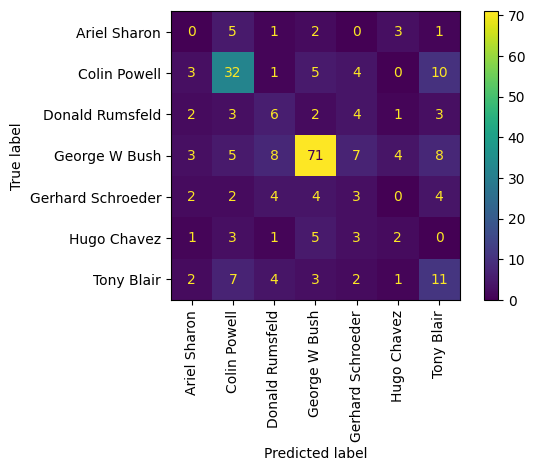

In [ ]:
tree_hog = DecisionTreeClassifier()
tree_hog.fit(X_train_hog, y_train)

hog_predictions = tree_hog.predict(X_test_hog)
print(classification_report(y_test, hog_predictions, target_names = target_names))
ConfusionMatrixDisplay.from_estimator(tree_hog, X_test_hog, y_test, display_labels=target_names, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

# Results with CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import keras

In [ ]:
model = Sequential()

model.add(Conv2D(1, (3, 3), activation='relu', input_shape=(50, 37, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y)), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


y_categorical = to_categorical(y_train, num_classes=len(np.unique(y)))
model.fit(X_train, y_categorical, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
26/26 [==============================] - 2s 41ms/step - loss: 2.0155 - accuracy: 0.2840 - val_loss: 1.6755 - val_accuracy: 0.4320
Epoch 2/50
26/26 [==============================] - 1s 19ms/step - loss: 1.7488 - accuracy: 0.3714 - val_loss: 1.6156 - val_accuracy: 0.4126
Epoch 3/50
26/26 [==============================] - 0s 18ms/step - loss: 1.6526 - accuracy: 0.4150 - val_loss: 1.5560 - val_accuracy: 0.4515
Epoch 4/50
26/26 [==============================] - 0s 19ms/step - loss: 1.5799 - accuracy: 0.4490 - val_loss: 1.4920 - val_accuracy: 0.4515
Epoch 5/50
26/26 [==============================] - 0s 18ms/step - loss: 1.5310 - accuracy: 0.4515 - val_loss: 1.4343 - val_accuracy: 0.5291
Epoch 6/50
26/26 [==============================] - 1s 19ms/step - loss: 1.4682 - accuracy: 0.4806 - val_loss: 1.3677 - val_accuracy: 0.5583
Epoch 7/50
26/26 [==============================] - 0s 18ms/step - loss: 1.3823 - accuracy: 0.5061 - val_loss: 1.3192 - val_accuracy: 0.5534
Epoch 8/50
26

In [ ]:
def cnn_activations(input, layer, filters):
  conv_layer = model.get_layer(layer)  #put name of the actual convolutional layer, based on the error message
  conv_model = keras.Model(inputs=model.inputs, outputs=conv_layer.output)

  activations = conv_model.predict(input)
  activations = np.squeeze(activations, axis=0)
  activation_map = activations[:, :, filters - 1]

  return activation_map

(1, 50, 37, 1)


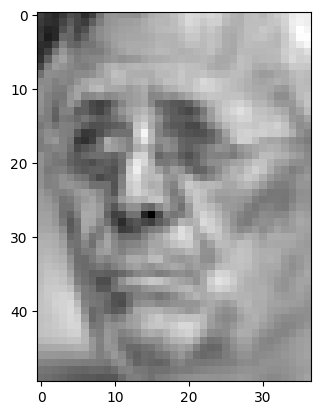

In [ ]:
image = X_test[0]
plt.imshow(image, cmap='gray')
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=-1)
print(image.shape)

1/1 [==============================] - 0s 103ms/step


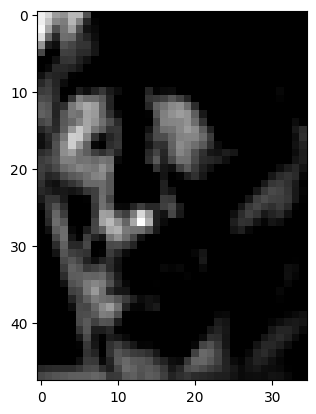

In [ ]:
plt.imshow(cnn_activations(image, 'conv2d_2', 1), cmap='gray')

In [ ]:
X_train_cnn = [cnn_activations(np.expand_dims(np.expand_dims(x, axis=0), axis=-1), 'conv2d_2', 1) for x in X_train]
X_test_cnn = [cnn_activations(np.expand_dims(np.expand_dims(x, axis=0), axis=-1), 'conv2d_2', 1) for x in X_test]

1/1 [==============================] - 0s 41ms/step


In [ ]:
X_train_cnn = np.array(X_train_cnn)
X_test_cnn = np.array(X_test_cnn)

X_train_cnn = X_train_cnn.reshape((X_train.shape[0], 48*35))
X_test_cnn = X_test_cnn.reshape((X_test.shape[0], 48*35))

SVM

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.17      0.29        12
     Colin Powell       0.87      0.71      0.78        55
  Donald Rumsfeld       0.85      0.52      0.65        21
    George W Bush       0.64      0.97      0.77       106
Gerhard Schroeder       1.00      0.37      0.54        19
      Hugo Chavez       0.83      0.33      0.48        15
       Tony Blair       0.65      0.50      0.57        30

         accuracy                           0.71       258
        macro avg       0.83      0.51      0.58       258
     weighted avg       0.76      0.71      0.68       258



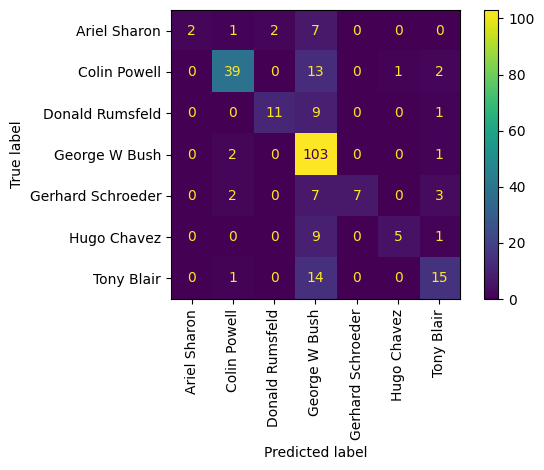

In [ ]:
svm_cnn = SVC(kernel = 'rbf', decision_function_shape='ovo')
svm_cnn.fit(X_train_cnn, y_train)

cnn_predictions = svm_cnn.predict(X_test_cnn)
print(classification_report(y_test, cnn_predictions, target_names = target_names))
ConfusionMatrixDisplay.from_estimator(svm_cnn, X_test_cnn, y_test, display_labels=target_names, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

KNN

                   precision    recall  f1-score   support

     Ariel Sharon       0.24      0.42      0.30        12
     Colin Powell       0.69      0.64      0.66        55
  Donald Rumsfeld       0.33      0.43      0.38        21
    George W Bush       0.66      0.77      0.71       106
Gerhard Schroeder       0.25      0.16      0.19        19
      Hugo Chavez       0.60      0.20      0.30        15
       Tony Blair       0.35      0.20      0.26        30

         accuracy                           0.55       258
        macro avg       0.45      0.40      0.40       258
     weighted avg       0.55      0.55      0.54       258



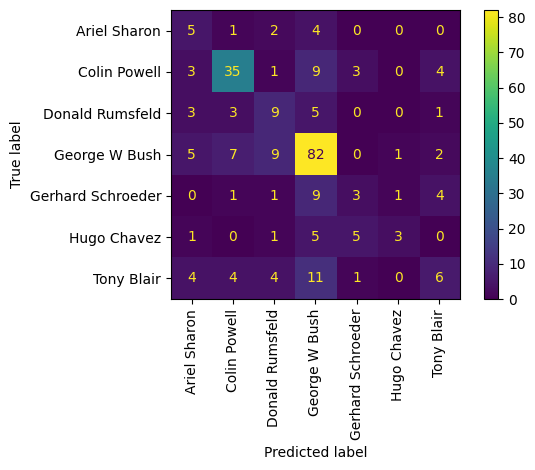

In [ ]:
knn_cnn = KNeighborsClassifier(n_neighbors = 5)
knn_cnn.fit(X_train_cnn, y_train)

cnn_predictions = knn_cnn.predict(X_test_cnn)
print(classification_report(y_test, cnn_predictions, target_names = target_names))
ConfusionMatrixDisplay.from_estimator(knn_cnn, X_test_cnn, y_test, display_labels=target_names, xticks_rotation="vertical")
plt.tight_layout()
plt.show()

Decision Tree

                   precision    recall  f1-score   support

     Ariel Sharon       0.20      0.17      0.18        12
     Colin Powell       0.56      0.51      0.53        55
  Donald Rumsfeld       0.17      0.14      0.15        21
    George W Bush       0.60      0.60      0.60       106
Gerhard Schroeder       0.24      0.42      0.31        19
      Hugo Chavez       0.38      0.20      0.26        15
       Tony Blair       0.38      0.40      0.39        30

         accuracy                           0.47       258
        macro avg       0.36      0.35      0.35       258
     weighted avg       0.47      0.47      0.46       258



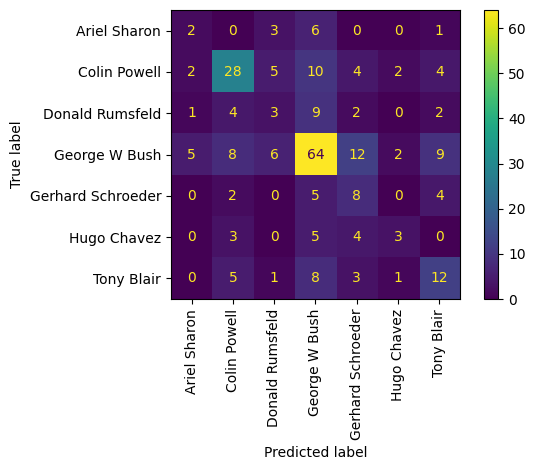

In [ ]:
tree_cnn = DecisionTreeClassifier()
tree_cnn.fit(X_train_cnn, y_train)

cnn_predictions = tree_cnn.predict(X_test_cnn)
print(classification_report(y_test, cnn_predictions, target_names = target_names))
ConfusionMatrixDisplay.from_estimator(tree_cnn, X_test_cnn, y_test, display_labels=target_names, xticks_rotation="vertical")
plt.tight_layout()
plt.show()